## Example of complex noise on speckle

In [5]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from mmfsim.grid import Grid
from mmfsim.fiber import StepIndexFiber
from mmfsim.speckle import DegenStepIndexSpeckle

from waveoptics.plots.plots import complex_to_hsv

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
grid_settings: dict = {'pixel_size': 0.25e-6, 'pixel_numbers': (256, 256)}
fiber_settings: dict = {'radius': 25e-6, 'wavelength': 1064e-9, 'n1': 1.465, 'n2': 1.45}

grid = Grid(**grid_settings)
fiber = StepIndexFiber(**fiber_settings)

fiber.compute_modes_fields(grid)

c:\users\saucourt\coding\mmf_lp_modes\mmfsim\fiber.py:261: RuntimeWarning: invalid value encountered in sqrt
  w = np.sqrt(v**2 - u**2)
c:\users\saucourt\coding\mmf_lp_modes\mmfsim\fiber.py:262: RuntimeWarning: invalid value encountered in divide
  return sp.jv(n, u) / (u * sp.jv(n - 1, u)) + sp.kn(n, w) / (w * sp.kn(n - 1, w))


In [3]:
spatial_extent = np.array([np.min(grid.x), np.max(grid.x), np.min(grid.y), np.max(grid.y)]) * 1e6

speckle = DegenStepIndexSpeckle(fiber, grid, N_modes=fiber._N_modes_degen)
speckle.compose()

field = speckle.field
field /= np.max(np.abs(field))

Text(0.5, 1.0, 'Field phase (noisys)')

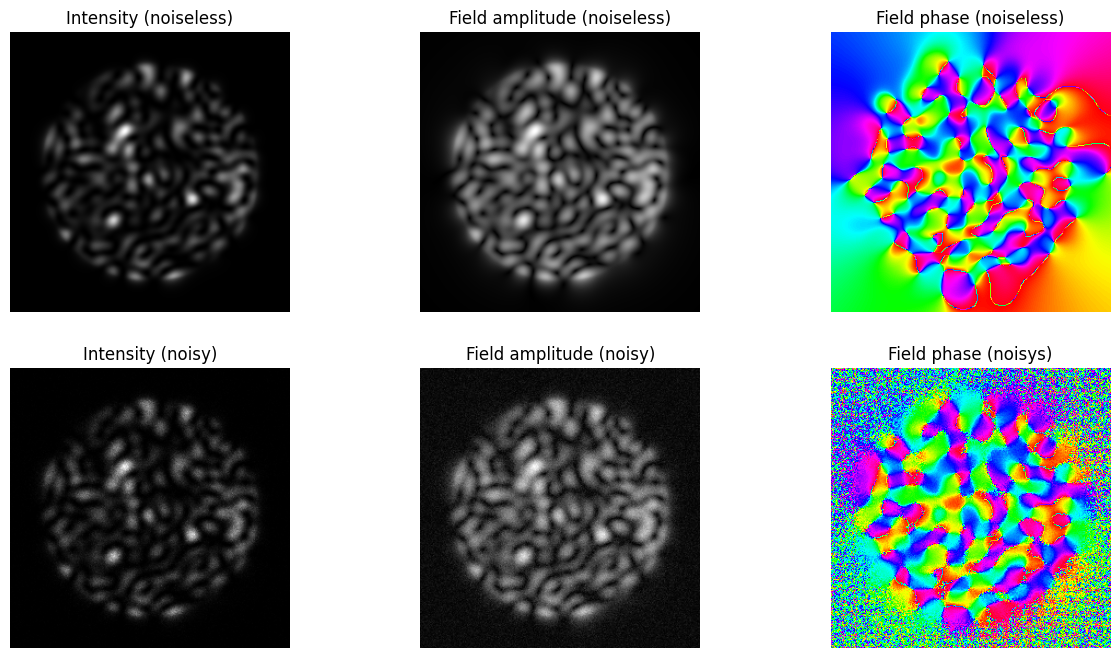

In [17]:
def complex_gaussian_noise(shape, sigma):
    return (np.random.randn(*shape) + 1j * np.random.randn(*shape)) * (sigma / np.sqrt(2))

noise = complex_gaussian_noise(field.shape, 0.05)
noisy_field = field + noise

intensity = np.square(np.abs(field))
noisy_intensity = np.square(np.abs(noisy_field))

plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(intensity, cmap='gray')
plt.axis('off')
plt.title("Intensity (noiseless)")

plt.subplot(2, 3, 2)
plt.imshow(np.abs(field), cmap='gray')
plt.axis('off')
plt.title("Field amplitude (noiseless)")

plt.subplot(2, 3, 3)
plt.imshow(np.angle(field), cmap='hsv')
plt.axis('off')
plt.title("Field phase (noiseless)")

plt.subplot(2, 3, 4)
plt.imshow(noisy_intensity, cmap='gray')
plt.axis('off')
plt.title("Intensity (noisy)")

plt.subplot(2, 3, 5)
plt.imshow(np.abs(noisy_field), cmap='gray')
plt.axis('off')
plt.title("Field amplitude (noisy)")

plt.subplot(2, 3, 6)
plt.imshow(np.angle(noisy_field), cmap='hsv')
plt.axis('off')
plt.title("Field phase (noisys)")



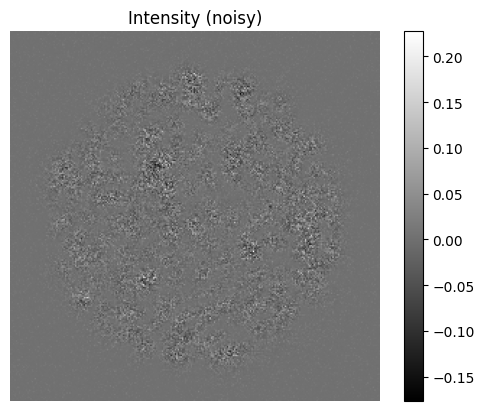

In [18]:
plt.imshow(noisy_intensity - intensity, cmap='gray')
plt.axis('off')
plt.title("Intensity (noisy)")
plt.colorbar()

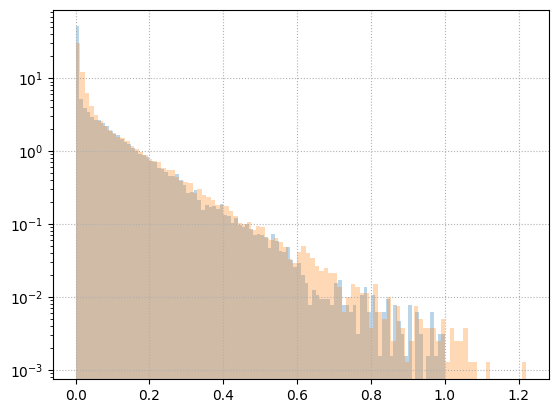

In [13]:
plt.hist(intensity.flatten(), alpha=0.3, density=True, bins=100);
plt.hist(noisy_intensity.flatten(), alpha=0.3, density=True, bins=100);
plt.yscale('log')
plt.grid(ls=':')

In [ ]:
plt.hist(np.real(field).flatten(), alpha=0.3, density=True, bins=100);
plt.hist(np.imag(field).flatten(), alpha=0.3, density=True, bins=100);
plt.yscale('log')
plt.grid(ls=':')

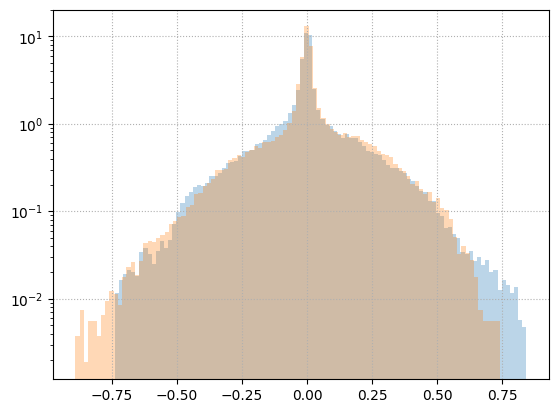

In [12]:
plt.hist(np.real(field).flatten(), alpha=0.3, density=True, bins=100);
plt.hist(np.imag(field).flatten(), alpha=0.3, density=True, bins=100);
plt.yscale('log')
plt.grid(ls=':')